In [4]:
!pip install utils

In [48]:
import pandas as pd
import matplotlib .pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
%matplotlib inline

In [6]:
df=pd.read_csv('house_data.csv')
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [7]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [8]:
df.isnull().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [9]:
df.shape

(5000, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   date       5000 non-null   int64
 1   age        5000 non-null   int64
 2   distance   5000 non-null   int64
 3   stores     5000 non-null   int64
 4   latitude   5000 non-null   int64
 5   longitude  5000 non-null   int64
 6   price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


array([[<Axes: title={'center': 'price'}>]], dtype=object)

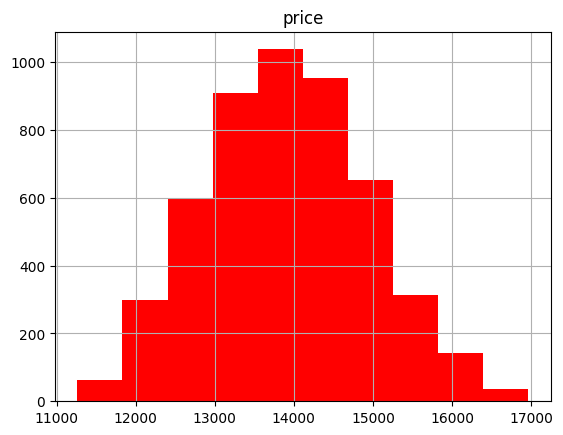

In [11]:
df.hist('price',color='red')

In [12]:
#DATA NORMALIZATION  --->Convert all the values of dataframe in same range for better preprocessing and results of data
df=df.iloc[:,1:]      #iloc[rows,col]--->It is an indexer used for integer-location-based indexing of data in a DataFrame.
df_norm=(df-df.mean())/df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [13]:
#xlabels
x=df_norm.iloc[:,:5]
x.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [14]:
#ylabels
y=df_norm.iloc[:,-1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [15]:
#feature and label values -->assign values into array
X_arr=x.values
Y_arr=y.values

In [16]:
#Train and test of datasets
X_train,X_test,y_train,y_test=train_test_split(X_arr,Y_arr,test_size=0.01)

In [17]:
X_train.shape

(4950, 5)

In [18]:
X_test.shape

(50, 5)

In [19]:
y_train.shape

(4950,)

In [20]:
y_test.shape

(50,)

In [22]:
#Creating the model for prediction
def get_model():
  model=Sequential([
      Dense(10,input_shape=(5,),activation='relu'),
      Dense(20,activation='relu'),
      Dense(5,activation='relu'),
      Dense(1)
  ])
  model.compile(loss='mse',optimizer='adadelta')
  return model

In [23]:
model=get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
#model training
model=get_model()
#prediction before training model
untrained_pred=model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [25]:
#train model and store in object trained_model
trained_model=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000)

Epoch 1/1000
155/155 [==============================] - 2s 6ms/step - loss: 0.9866 - val_loss: 0.8740
Epoch 2/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9849 - val_loss: 0.8724
Epoch 3/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9832 - val_loss: 0.8709
Epoch 4/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9817 - val_loss: 0.8694
Epoch 5/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9801 - val_loss: 0.8680
Epoch 6/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9786 - val_loss: 0.8666
Epoch 7/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9771 - val_loss: 0.8653
Epoch 8/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9756 - val_loss: 0.8640
Epoch 9/1000
155/155 [==============================] - 0s 3ms/step - loss: 0.9741 - val_loss: 0.8627
Epoch 10/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.972

In [35]:
#Predictions   ---->predictions on trained model
preds_on_trained=model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


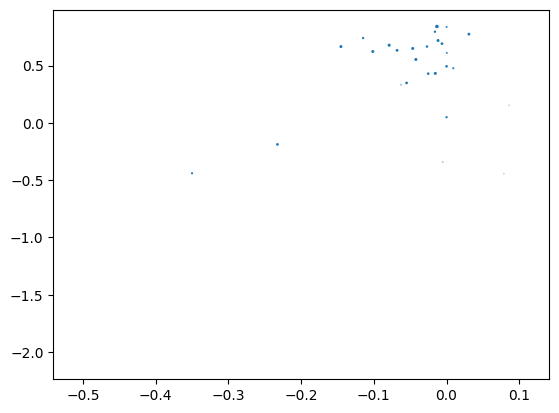

In [37]:
plt.scatter(untrained_pred,preds_on_trained,y_test)

In [41]:
#Convert label values into actual price
y_mean=df['price'].mean()
y_std=df['price'].std()
def convert_label_actual(pred):
  return int(pred*y_std+y_mean)

print(convert_label_actual(0.350998))

14264


In [42]:
#Price Predictions
price_on_untrained=[convert_label_actual(y) for y in untrained_pred]
price_on_trained=[convert_label_actual(y) for y in preds_on_trained]
price_y_test=[convert_label_actual(y) for y in y_test]

In [50]:
price_y_test

[15259,
 14689,
 13718,
 14791,
 13548,
 13557,
 16340,
 15248,
 13958,
 14867,
 13277,
 13172,
 15286,
 12636,
 14939,
 13925,
 12498,
 14644,
 12404,
 12418,
 14563,
 14271,
 13576,
 15043,
 12853,
 12656,
 14088,
 12192,
 13618,
 13231,
 12789,
 13924,
 12397,
 14350,
 13811,
 14428,
 14845,
 14382,
 15218,
 14122,
 12941,
 15232,
 13391,
 13465,
 15301,
 15446,
 13533,
 13814,
 13941,
 14211]